# Evaluate the Test Predictions

Make sure the working directory is located at the project root of the directory:

In [1]:
import os
os.chdir('..')
os.getcwd()

'/Users/aaronquinton/Documents/UBC-MDS/Capstone/BCstats/DSCI_591_capstone-BCStats'

In [2]:
import pickle
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
from src.models.evaluate_results import theme_results, plot_theme_ROC, plot_average_ROC_by_embed

In [3]:
df_test = pd.read_csv('./data/interim/test_2018-qualitative-data.csv')
Y_test = np.array(df_test.loc[:, "CPD":"OTH"])

In [4]:
Y_test

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [5]:
with open('./data/output/test_predictions.pickle', 'rb') as handle:
          Y_pred = pickle.load(handle)

In [6]:
Y_pred

{'BOW': <1475x12 sparse matrix of type '<class 'numpy.int64'>'
 	with 1844 stored elements in Compressed Sparse Column format>,
 'ensemble': array([[2.1299915e-03, 9.9250543e-01, 1.6461934e-03, ..., 2.7326518e-03,
         8.8258379e-04, 2.9045891e-03],
        [2.1184605e-02, 9.9819666e-01, 5.6693372e-03, ..., 6.0208584e-03,
         6.5606674e-03, 1.7733434e-02],
        [9.0705532e-01, 5.4104719e-03, 5.8839526e-03, ..., 1.0828227e-01,
         1.2088070e-02, 4.8846165e-03],
        ...,
        [1.9524906e-02, 9.6473408e-01, 7.1488633e-03, ..., 4.0865056e-03,
         6.4968448e-03, 4.6501658e-03],
        [8.4879048e-02, 8.6798156e-03, 1.4511412e-03, ..., 5.0977595e-02,
         1.5109201e-03, 5.3326547e-04],
        [1.1814250e-02, 2.6558826e-03, 2.3623559e-01, ..., 3.1003286e-03,
         4.2966768e-02, 1.5678781e-01]], dtype=float32)}

## Bag of Words

Take a look at the Base Line Results overall, and by theme:

In [7]:
Y_pred['BOW'].toarray()

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [8]:
df_overall, df_theme = theme_results(Y_test,Y_pred['BOW'].toarray())

In [9]:
df_overall

,Metric,Value
0,Overall Accuracy,0.4488
1,Hamming Loss,0.0713
2,Micro-average Precision,0.7435
3,Micro-average Recall,0.6347


In [10]:
df_theme

,Label,Y_count,Pred_count,Error,Dummy_Diff,Accuarcy,Precision,Recall
0,CPD,184,156,0.070508,0.054237,0.929492,0.756410,0.641304
1,CB,293,265,0.043390,0.155254,0.956610,0.932075,0.843003
2,EWC,141,98,0.071186,0.024407,0.928814,0.683673,0.475177
3,Exec,149,123,0.080000,0.021017,0.920000,0.626016,0.516779
4,FWE,91,85,0.027119,0.034576,0.972881,0.800000,0.747253
5,SP,145,142,0.069831,0.028475,0.930169,0.647887,0.634483
6,RE,124,91,0.082034,0.002034,0.917966,0.516484,0.379032
7,Sup,216,175,0.098305,0.048136,0.901695,0.702857,0.569444
8,SW,244,228,0.093559,0.071864,0.906441,0.732456,0.684426
9,TEPE,341,307,0.070508,0.160678,0.929492,0.885993,0.797654


## Deep Learning Ensemble

In [11]:
df_overall, df_theme = theme_results(Y_test,np.round(Y_pred['ensemble']))

In [12]:
df_overall

,Metric,Value
0,Overall Accuracy,0.5315
1,Hamming Loss,0.0575
2,Micro-average Precision,0.8309
3,Micro-average Recall,0.6644


In [13]:
df_theme

,Label,Y_count,Pred_count,Error,Dummy_Diff,Accuarcy,Precision,Recall
0,CPD,184,157,0.056271,0.068475,0.943729,0.821656,0.701087
1,CB,293,280,0.031864,0.166780,0.968136,0.939286,0.897611
2,EWC,141,90,0.063051,0.032542,0.936949,0.766667,0.489362
3,Exec,149,104,0.060339,0.040678,0.939661,0.788462,0.550336
4,FWE,91,81,0.023051,0.038644,0.976949,0.851852,0.758242
5,SP,145,144,0.049492,0.048814,0.950508,0.750000,0.744828
6,RE,124,61,0.061695,0.022373,0.938305,0.770492,0.379032
7,Sup,216,160,0.088136,0.058305,0.911864,0.768750,0.569444
8,SW,244,175,0.083390,0.082034,0.916610,0.845714,0.606557
9,TEPE,341,325,0.054237,0.176949,0.945763,0.901538,0.859238


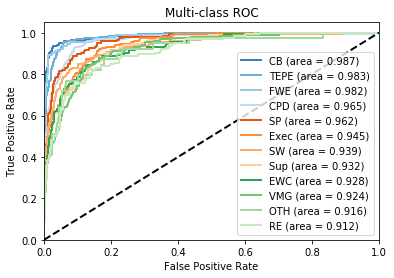

In [14]:
plot_theme_ROC(Y_test,Y_pred['ensemble'], save_fpath='./reports/figures/theme_ROC')

## Adjust the Probability Threshold

By Increasing the probability threshold to classify, we are lowering our overall accuracy, but increasing the precision. We are effectively splitting the comments into hard and easy categories. Leaving the hard commens unlabeled.

In [30]:
predictions = np.round(Y_pred['ensemble']-0.42)

a,b = theme_results(Y_test, predictions)
size = predictions.shape[0]
zero_size = (predictions[predictions.sum(axis = 1) == 0,:].shape[0])
print("Total comments:", size, 
      "\nTotal Predictions:", size - zero_size, 
      "\nPercent Pred non-zero:", round(1 - zero_size/size, 4))
a

Total comments: 1475 
Total Predictions: 766 
Percent Pred non-zero: 0.5193


,Metric,Value
0,Overall Accuracy,0.3546
1,Hamming Loss,0.0806
2,Micro-average Precision,0.9588
3,Micro-average Recall,0.3551


In [31]:
b

,Label,Y_count,Pred_count,Error,Dummy_Diff,Accuarcy,Precision,Recall
0,CPD,184,69,0.082034,0.042712,0.917966,0.956522,0.358696
1,CB,293,211,0.063729,0.134915,0.936271,0.971564,0.699659
2,EWC,141,18,0.083390,0.012203,0.916610,1.000000,0.127660
3,Exec,149,22,0.087458,0.013559,0.912542,0.954545,0.140940
4,FWE,91,49,0.029831,0.031864,0.970169,0.979592,0.527473
5,SP,145,47,0.074576,0.023729,0.925424,0.872340,0.282759
6,RE,124,13,0.077966,0.006102,0.922034,0.846154,0.088710
7,Sup,216,27,0.130847,0.015593,0.869153,0.925926,0.115741
8,SW,244,74,0.120678,0.044746,0.879322,0.945946,0.286885
9,TEPE,341,238,0.080678,0.150508,0.919322,0.966387,0.674487


The results on the ~50% of comments that do have labels

In [32]:
non_zero_pred = predictions[predictions.sum(axis = 1) != 0,:]
non_zero_valid = Y_test[predictions.sum(axis = 1) != 0,:]

a,b = theme_results(non_zero_valid, non_zero_pred)
a

,Metric,Value
0,Overall Accuracy,0.6671
1,Hamming Loss,0.0407
2,Micro-average Precision,0.9588
3,Micro-average Recall,0.6922


In [33]:
b

,Label,Y_count,Pred_count,Error,Dummy_Diff,Accuarcy,Precision,Recall
0,CPD,105,69,0.054830,0.082245,0.945170,0.956522,0.628571
1,CB,230,211,0.040470,0.259791,0.959530,0.971564,0.891304
2,EWC,49,18,0.040470,0.023499,0.959530,1.000000,0.367347
3,Exec,40,22,0.026110,0.026110,0.973890,0.954545,0.525000
4,FWE,65,49,0.023499,0.061358,0.976501,0.979592,0.738462
5,SP,70,47,0.045692,0.045692,0.954308,0.872340,0.585714
6,RE,37,13,0.036554,0.011749,0.963446,0.846154,0.297297
7,Sup,60,27,0.048303,0.030026,0.951697,0.925926,0.416667
8,SW,123,74,0.074413,0.086162,0.925587,0.945946,0.569106
9,TEPE,256,238,0.044386,0.289817,0.955614,0.966387,0.898438


In [34]:
#prob_threshold = np.arange(-0.45,0.45,0.01) 

prob_threshold = np.concatenate((np.arange(-0.499999,-0.49,0.0001),
                                 np.arange(-0.49,0.49,0.01),
                                 np.arange(0.49,0.49999,0.0001)))

In [35]:
accuracy = []
recall = []
precision = []
prob_adj = []
non_zero_percent = []

for i in prob_threshold:
    
    prob_adj.append(min((0.5 + i),1))
    predictions = np.round(Y_pred['ensemble'] - i)
    
    size = predictions.shape[0]
    zero_size = (predictions[predictions.sum(axis = 1) == 0,:].shape[0])
    
    non_zero_pred = predictions[predictions.sum(axis = 1) != 0,:]
    non_zero_valid = Y_test[predictions.sum(axis = 1) != 0,:]
    
    a,b = theme_results(non_zero_valid, non_zero_pred)
    precision.append(a.Value[2])
    recall.append(a.Value[3])
    
    
    
    accuracy.append(metrics.accuracy_score(non_zero_valid, non_zero_pred))
    non_zero_percent.append(round(1 - zero_size/size, 4))

results_tradeoff = pd.DataFrame({'prob_adj': prob_adj,
                                 'accuracy':accuracy,
                                 'precision': precision,
                                 'recall' : recall,
                                 'non_zero_percent':non_zero_percent})


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


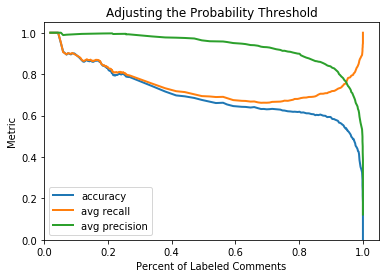

In [36]:
plt.figure()
colors = plt.get_cmap('tab10').colors

plt.plot(results_tradeoff['non_zero_percent'], 
         results_tradeoff['accuracy'], 
         color=colors[0], lw=2,
         label='accuracy')
plt.plot(results_tradeoff['non_zero_percent'], 
         results_tradeoff['recall'], 
         color=colors[1], lw=2,
         label='avg recall')
plt.plot(results_tradeoff['non_zero_percent'], 
         results_tradeoff['precision'], 
         color=colors[2], lw=2,
         label='avg precision')

plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('Percent of Labeled Comments')
plt.ylabel('Metric')
plt.title('Adjusting the Probability Threshold')
plt.legend(loc="lower left")
plt.savefig('./reports/figures/prob_threshold', dpi = 900)

plt.show()